In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import seaborn as sns
import time

In [2]:
os.getcwd()
pd.set_option('display.max_columns', None)

# Data Preparation

In [3]:
df = pd.read_json('data-sample.json')
df

,taskLocationDone,taskCreatedTime,cod,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,UserVar
0,"{'lon': 109.7629103, 'lat': -6.9266078}",2022-11-01 20:17:26 +0700,"{'amount': 685000, 'received': True}",pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,"{'branch_dest': 'SRG', 'taskStatusLabel': 'Suc..."
1,"{'lon': 110.0339859, 'lat': -7.8761542}",2022-11-01 08:41:07 +0700,"{'amount': 53500, 'received': True}",peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
2,"{'lon': 109.999733, 'lat': -7.8497772999999995}",2022-11-01 08:41:07 +0700,"{'amount': 179500, 'received': True}",peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
3,"{'lon': 110.0037077, 'lat': -7.710998}",2022-11-01 08:41:07 +0700,"{'amount': 31815, 'received': True}",peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
4,"{'lon': 110.0138869, 'lat': -7.8297416}",2022-11-01 08:41:07 +0700,"{'amount': 144562, 'received': True}",peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
...,...,...,...,...,...,...,...,...,...
8329,"{'lon': 0, 'lat': 0}",2022-11-10 09:07:12 +0700,NaN,debonairPonie1,2022-11-10 09:38:04 +0700,done,Delivery,501af4e040a742e9e878,"{'branch_dest': 'CGK', 'taskStatusLabel': 'Suc..."
8330,"{'lon': 110.3520537, 'lat': -7.8925713}",2022-11-10 09:21:42 +0700,NaN,murkyThrushe3,2022-11-10 09:37:52 +0700,done,Delivery,5cc952d9e9f8066dbf24,"{'branch_dest': 'JOG', 'taskStatusLabel': 'Fai..."
8331,"{'lon': 105.6648975, 'lat': -5.3590626}",2022-11-10 09:36:44 +0700,NaN,enragedCake7,2022-11-10 09:37:55 +0700,done,Delivery,1b136b5a3c60749eb571,"{'branch_dest': 'TKG', 'taskStatusLabel': 'Suc..."
8332,"{'lon': 119.8771726, 'lat': -8.5133055}",2022-11-10 07:25:40 +0700,"{'amount': 151000, 'received': False}",lyingPaella2,2022-11-10 10:37:53 +0800,done,Delivery,e92e813c8539080c922e,"{'branch_dest': 'KOE', 'taskStatusLabel': 'Fai..."


In [4]:
# Function to flatten a dictionary column
def flatten_dict_column(df, column_name):
    if isinstance(df[column_name].iloc[0], dict): #check if column is dict or not by check the first row
        flattened_df = pd.json_normalize(df[column_name]) #function to flattened json to tabular data 
        #drop the  dict column and replace it with flattened columns 
        return pd.concat([df.drop(column_name, axis=1),  #axis 1 = drop columns that consist dict
                            flattened_df], axis=1) #axis 1 = concate the columns from flatened_df to df
    else:
        return df


In [5]:
pd.json_normalize(df['cod']) #function to flattened json to tabular data


,amount,received
0,685000.0,True
1,53500.0,True
2,179500.0,True
3,31815.0,True
4,144562.0,True
...,...,...
8329,NaN,NaN
8330,NaN,NaN
8331,NaN,NaN
8332,151000.0,False


In [6]:
#Flattened Dict Columns
df.columns
for c in df.columns:
    column_name = c
    df = flatten_dict_column(df, column_name)



In [7]:
df

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,lon,lat,amount,received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,taskStatus
0,2022-11-01 20:17:26 +0700,pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK,COLF01
1,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK,COLF01
2,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01
3,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01
4,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562.0,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,2022-11-10 09:07:12 +0700,debonairPonie1,2022-11-10 09:38:04 +0700,done,Delivery,501af4e040a742e9e878,0.000000,0.000000,NaN,NaN,CGK,Success,"PALMERAH ,JAKARTA BA",ATASAN/STAFF/KARYAWAN/BAWAHAN,D10,1,CGK,COLF01
8330,2022-11-10 09:21:42 +0700,murkyThrushe3,2022-11-10 09:37:52 +0700,done,Delivery,5cc952d9e9f8066dbf24,110.352054,-7.892571,NaN,NaN,JOG,Failed,KOTA BANTUL,ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL,U01,1,TGR,COLF02
8331,2022-11-10 09:36:44 +0700,enragedCake7,2022-11-10 09:37:55 +0700,done,Delivery,1b136b5a3c60749eb571,105.664897,-5.359063,NaN,NaN,TKG,Success,MARGA SEKAMPUNG KAB.,YANG BERSANGKUTAN,D01,1.44,CGK,COLF01
8332,2022-11-10 07:25:40 +0700,lyingPaella2,2022-11-10 10:37:53 +0800,done,Delivery,e92e813c8539080c922e,119.877173,-8.513305,151000.0,False,KOE,Failed,"KOMODO,LABUAN BAJO",PENERIMA PINDAH ALAMAT,U03,0.6,CGK,COLF02


In [8]:
df.columns

Index(['taskCreatedTime', 'taskAssignedTo', 'taskCompletedTime', 'taskStatus',
       'flow', 'taskId', 'lon', 'lat', 'amount', 'received', 'branch_dest',
       'taskStatusLabel', 'receiver_city', 'taskDetailStatusLabel',
       'taskDetailStatus', 'weight', 'branch_origin', 'taskStatus'],
      dtype='object')

In [9]:
#Change duplicate columns name and add on specific column name
df.columns = ['taskCreatedTime', 'taskAssignedTo', 'taskCompletedTime', 'taskStatus',
       'flow', 'taskId', 'lon', 'lat', 'cod_amount', 'cod_received', 'branch_dest',
       'taskStatusLabel', 'receiver_city', 'taskDetailStatusLabel',
       'taskDetailStatus', 'weight', 'branch_origin', 'taskStatus_1']

In [10]:
df.dtypes

taskCreatedTime           object
taskAssignedTo            object
taskCompletedTime         object
taskStatus                object
flow                      object
taskId                    object
lon                      float64
lat                      float64
cod_amount               float64
cod_received              object
branch_dest               object
taskStatusLabel           object
receiver_city             object
taskDetailStatusLabel     object
taskDetailStatus          object
weight                    object
branch_origin             object
taskStatus_1              object
dtype: object

In [11]:
df.isna().sum()

taskCreatedTime             0
taskAssignedTo              1
taskCompletedTime         768
taskStatus                  0
flow                        0
taskId                      0
lon                       768
lat                       768
cod_amount               5976
cod_received             5976
branch_dest                 0
taskStatusLabel           762
receiver_city              52
taskDetailStatusLabel     762
taskDetailStatus          762
weight                      0
branch_origin             293
taskStatus_1              762
dtype: int64

In [12]:
#change to numeric
df['weight'] = pd.to_numeric(df['weight'])

In [13]:
df.dtypes

taskCreatedTime           object
taskAssignedTo            object
taskCompletedTime         object
taskStatus                object
flow                      object
taskId                    object
lon                      float64
lat                      float64
cod_amount               float64
cod_received              object
branch_dest               object
taskStatusLabel           object
receiver_city             object
taskDetailStatusLabel     object
taskDetailStatus          object
weight                   float64
branch_origin             object
taskStatus_1              object
dtype: object

In [14]:
# df['taskCreatedTime_conv'] = pd.to_datetime(df['taskCreatedTime'],errors='coerce').dt.tz_convert('UTC')
# df['taskCompletedTime_conv'] = pd.to_datetime(df['taskCompletedTime'], errors='coerce', utc= True).dt.tz_convert('UTC')

# Exploatory Data Analysis

In [15]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, title="MileApp")
# profile

In [16]:
df

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,lon,lat,cod_amount,cod_received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,taskStatus_1
0,2022-11-01 20:17:26 +0700,pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13.000,CGK,COLF01
1,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.300,CGK,COLF01
2,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3.000,CGK,COLF01
3,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01
4,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562.0,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3.000,CGK,COLF01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,2022-11-10 09:07:12 +0700,debonairPonie1,2022-11-10 09:38:04 +0700,done,Delivery,501af4e040a742e9e878,0.000000,0.000000,NaN,NaN,CGK,Success,"PALMERAH ,JAKARTA BA",ATASAN/STAFF/KARYAWAN/BAWAHAN,D10,1.000,CGK,COLF01
8330,2022-11-10 09:21:42 +0700,murkyThrushe3,2022-11-10 09:37:52 +0700,done,Delivery,5cc952d9e9f8066dbf24,110.352054,-7.892571,NaN,NaN,JOG,Failed,KOTA BANTUL,ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL,U01,1.000,TGR,COLF02
8331,2022-11-10 09:36:44 +0700,enragedCake7,2022-11-10 09:37:55 +0700,done,Delivery,1b136b5a3c60749eb571,105.664897,-5.359063,NaN,NaN,TKG,Success,MARGA SEKAMPUNG KAB.,YANG BERSANGKUTAN,D01,1.440,CGK,COLF01
8332,2022-11-10 07:25:40 +0700,lyingPaella2,2022-11-10 10:37:53 +0800,done,Delivery,e92e813c8539080c922e,119.877173,-8.513305,151000.0,False,KOE,Failed,"KOMODO,LABUAN BAJO",PENERIMA PINDAH ALAMAT,U03,0.600,CGK,COLF02


### Checking Missing 

In [17]:
df.isna().sum()

taskCreatedTime             0
taskAssignedTo              1
taskCompletedTime         768
taskStatus                  0
flow                        0
taskId                      0
lon                       768
lat                       768
cod_amount               5976
cod_received             5976
branch_dest                 0
taskStatusLabel           762
receiver_city              52
taskDetailStatusLabel     762
taskDetailStatus          762
weight                      0
branch_origin             293
taskStatus_1              762
dtype: int64

In [18]:
df["cod_received"].value_counts()

False    1663
True      695
Name: cod_received, dtype: int64

In [19]:
#Impute on NaN value for COD columns
df[(df["cod_received"].isna()) & (df["taskStatus"]=='done')]

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,lon,lat,cod_amount,cod_received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,taskStatus_1
73,2022-11-01 09:31:32 +0700,enragedLlama3,2022-11-01 13:14:31 +0700,done,Delivery,b7f9f3f96def6b866166,98.814915,1.713917,NaN,NaN,DTB,Success,"SARUDIK,TAPANULI TEN",YANG BERSANGKUTAN,D01,1.00,MES,COLF01
550,2022-11-01 15:04:06 +0700,mildCardinal0,NaN,done,Delivery,9779ae5b5f88ba0bf31c,NaN,NaN,NaN,NaN,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,3.00,CGK,COLF01
551,2022-11-01 16:59:58 +0700,mildCardinal0,NaN,done,Delivery,8ade827b1e3530c02e82,NaN,NaN,NaN,NaN,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,4.90,CGK,COLF01
552,2022-11-01 16:59:58 +0700,mildCardinal0,NaN,done,Delivery,292b1e9f73099dac1209,NaN,NaN,NaN,NaN,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,8.00,CGK,COLF01
553,2022-11-01 16:59:58 +0700,mildCardinal0,NaN,done,Delivery,7e8862b3f4010465f006,NaN,NaN,NaN,NaN,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,17.00,BDO,COLF01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8328,2022-11-10 07:46:14 +0700,emptyPretzels3,2022-11-10 09:37:50 +0700,done,Delivery,469a6678ea253784e7e3,0.000000,0.000000,NaN,NaN,CGK,Success,JAKARTA PUSAT,RECEPTIONIST,D02,1.00,CGK,COLF01
8329,2022-11-10 09:07:12 +0700,debonairPonie1,2022-11-10 09:38:04 +0700,done,Delivery,501af4e040a742e9e878,0.000000,0.000000,NaN,NaN,CGK,Success,"PALMERAH ,JAKARTA BA",ATASAN/STAFF/KARYAWAN/BAWAHAN,D10,1.00,CGK,COLF01
8330,2022-11-10 09:21:42 +0700,murkyThrushe3,2022-11-10 09:37:52 +0700,done,Delivery,5cc952d9e9f8066dbf24,110.352054,-7.892571,NaN,NaN,JOG,Failed,KOTA BANTUL,ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL,U01,1.00,TGR,COLF02
8331,2022-11-10 09:36:44 +0700,enragedCake7,2022-11-10 09:37:55 +0700,done,Delivery,1b136b5a3c60749eb571,105.664897,-5.359063,NaN,NaN,TKG,Success,MARGA SEKAMPUNG KAB.,YANG BERSANGKUTAN,D01,1.44,CGK,COLF01


In [20]:
#SEE what happened to an 
df[df['taskCompletedTime'].isnull() & df['taskDetailStatusLabel'].isnull() ]

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,lon,lat,cod_amount,cod_received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,taskStatus_1
680,2022-11-02 08:06:34 +0700,vengefulCheese4,NaN,ongoing,Delivery,0bed2d5cd82456af0239,NaN,NaN,NaN,NaN,MES,NaN,"DOLOK PANRIBUAN,SIMA",NaN,NaN,1.00,CGK,NaN
684,2022-11-02 08:06:34 +0700,vengefulCheese4,NaN,ongoing,Delivery,3e9117e0d978e79e02e9,NaN,NaN,NaN,NaN,MES,NaN,"SIANTAR TIMUR,PEMATA",NaN,NaN,1.00,MES,NaN
685,2022-11-02 08:06:34 +0700,vengefulCheese4,NaN,ongoing,Delivery,898eb4f04d5eb328ed94,NaN,NaN,550000.0,False,MES,NaN,"SIANTAR TIMUR,PEMATA",NaN,NaN,1.00,SOC,NaN
686,2022-11-02 08:06:34 +0700,vengefulCheese4,NaN,ongoing,Delivery,eafd37c5536bc45e5a43,NaN,NaN,NaN,NaN,MES,NaN,"SIANTAR TIMUR,PEMATA",NaN,NaN,1.00,MES,NaN
687,2022-11-02 08:06:34 +0700,vengefulCheese4,NaN,ongoing,Delivery,d59413b44eb9878eca66,NaN,NaN,NaN,NaN,MES,NaN,"SIANTAR BARAT,PEMATA",NaN,NaN,1.00,PDG,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7954,2022-11-10 09:31:47 +0700,yearningOrange7,NaN,ongoing,Delivery,0247c7beef13f9d2fd7e,NaN,NaN,178000.0,False,BKI,NaN,"BABELAN,CIKARANG",NaN,NaN,1.00,CGK,NaN
7992,2022-11-10 09:31:53 +0700,relievedIguana0,NaN,ongoing,Delivery,abe2c1babb7feef85fda,NaN,NaN,275010.0,False,MDC,NaN,MELONGUANE,NaN,NaN,1.00,CGK,NaN
8002,2022-11-10 09:32:08 +0700,mellowPolenta1,NaN,ongoing,Delivery,d6ce7905450324498c30,NaN,NaN,NaN,NaN,DPK,NaN,"CINERE,DEPOK",NaN,NaN,4.35,CGK,NaN
8007,2022-11-10 09:32:07 +0700,pacifiedThrush4,NaN,ongoing,Delivery,d3db332e6196498e781d,NaN,NaN,269000.0,False,PDG,NaN,"GUNUNG TALANG,AROSUK",NaN,NaN,1.00,CGK,NaN


In [21]:
df.sort_values(by=['taskCompletedTime'] ,ascending=True).loc[~df['taskDetailStatus'].isnull()]


,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,lon,lat,cod_amount,cod_received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,taskStatus_1
110,2022-11-01 08:33:37 +0700,grumpyCaribou3,2022-11-01 09:08:55 +0700,done,Delivery,5bc42ce849cb60659f02,97.817744,0.569078,16000.0,True,DTB,Success,"TELUK DALAM,KAB.NIAS",YANG BERSANGKUTAN,D01,1.0,MES,COLF01
371,2022-11-01 07:24:05 +0700,importedStork6,2022-11-01 09:10:28 +0700,done,Delivery,1c8894b1383b870cab77,108.629415,-7.328136,16500.0,True,CXP,Success,"WANAREJA,CILACAP",YANG BERSANGKUTAN,D01,0.3,CGK,COLF01
274,2022-11-01 08:31:33 +0700,cockyWhiting9,2022-11-01 09:12:05 +0700,done,Delivery,5fb3f23f8dcf16c6c2be,110.216317,-7.262263,93400.0,True,MGL,Success,"KALORAN,TEMANGGUNG",YANG BERSANGKUTAN,D01,0.5,CGK,COLF01
566,2022-11-01 08:37:40 +0700,gleefulChough9,2022-11-01 09:14:20 +0700,done,Delivery,7e54cfd790164d1504df,110.270188,-6.971689,18999.0,True,SRG,Success,"KALIWUNGU,KENDAL",YANG BERSANGKUTAN,D01,0.2,CGK,COLF01
272,2022-11-01 08:31:32 +0700,cockyWhiting9,2022-11-01 09:16:06 +0700,done,Delivery,3196869fc0ebd01db92e,110.224392,-7.262976,40633.0,True,MGL,Success,"KALORAN,TEMANGGUNG",YANG BERSANGKUTAN,D01,1.3,CGK,COLF01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,2022-11-01 16:59:58 +0700,mildCardinal0,NaN,done,Delivery,8ade827b1e3530c02e82,NaN,NaN,NaN,NaN,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,4.9,CGK,COLF01
552,2022-11-01 16:59:58 +0700,mildCardinal0,NaN,done,Delivery,292b1e9f73099dac1209,NaN,NaN,NaN,NaN,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,8.0,CGK,COLF01
553,2022-11-01 16:59:58 +0700,mildCardinal0,NaN,done,Delivery,7e8862b3f4010465f006,NaN,NaN,NaN,NaN,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,17.0,BDO,COLF01
554,2022-11-01 10:13:02 +0700,mildCardinal0,NaN,done,Delivery,a4fb8aed363abc3d6af3,NaN,NaN,NaN,NaN,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,1.0,CGK,COLF01


## Visualization

### 1. Lot Lan

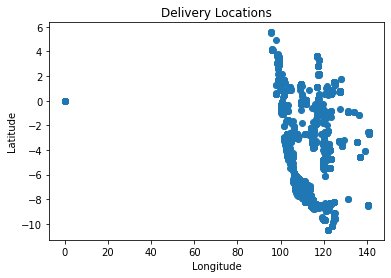

In [22]:
# Lat and Long

plt.scatter(df['lon'], df['lat'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Delivery Locations')
plt.show()

In [23]:
print(f'Total NA value on column Lon and Lat is {df["lon"].isna().sum()}, {df["lat"].isna().sum()}')

Total NA value on column Lon and Lat is 768, 768


In [24]:
#print lot Lan that is (0,0)
((df["lat"] == 0) & (df["lon"] == 0)).value_counts()


False    5883
True     2451
dtype: int64

In [25]:
'''There is Outlier on Lat Lon showed (0,0), Need to do more analysis'''
df.sort_values(by=['taskCompletedTime'] ,ascending=True).loc[df['taskCompletedTime'].isnull()]


,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,lon,lat,cod_amount,cod_received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,taskStatus_1
550,2022-11-01 15:04:06 +0700,mildCardinal0,NaN,done,Delivery,9779ae5b5f88ba0bf31c,NaN,NaN,NaN,NaN,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,3.00,CGK,COLF01
551,2022-11-01 16:59:58 +0700,mildCardinal0,NaN,done,Delivery,8ade827b1e3530c02e82,NaN,NaN,NaN,NaN,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,4.90,CGK,COLF01
552,2022-11-01 16:59:58 +0700,mildCardinal0,NaN,done,Delivery,292b1e9f73099dac1209,NaN,NaN,NaN,NaN,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,8.00,CGK,COLF01
553,2022-11-01 16:59:58 +0700,mildCardinal0,NaN,done,Delivery,7e8862b3f4010465f006,NaN,NaN,NaN,NaN,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,17.00,BDO,COLF01
554,2022-11-01 10:13:02 +0700,mildCardinal0,NaN,done,Delivery,a4fb8aed363abc3d6af3,NaN,NaN,NaN,NaN,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,1.00,CGK,COLF01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7954,2022-11-10 09:31:47 +0700,yearningOrange7,NaN,ongoing,Delivery,0247c7beef13f9d2fd7e,NaN,NaN,178000.0,False,BKI,NaN,"BABELAN,CIKARANG",NaN,NaN,1.00,CGK,NaN
7992,2022-11-10 09:31:53 +0700,relievedIguana0,NaN,ongoing,Delivery,abe2c1babb7feef85fda,NaN,NaN,275010.0,False,MDC,NaN,MELONGUANE,NaN,NaN,1.00,CGK,NaN
8002,2022-11-10 09:32:08 +0700,mellowPolenta1,NaN,ongoing,Delivery,d6ce7905450324498c30,NaN,NaN,NaN,NaN,DPK,NaN,"CINERE,DEPOK",NaN,NaN,4.35,CGK,NaN
8007,2022-11-10 09:32:07 +0700,pacifiedThrush4,NaN,ongoing,Delivery,d3db332e6196498e781d,NaN,NaN,269000.0,False,PDG,NaN,"GUNUNG TALANG,AROSUK",NaN,NaN,1.00,CGK,NaN


#### Lat Lon and task status

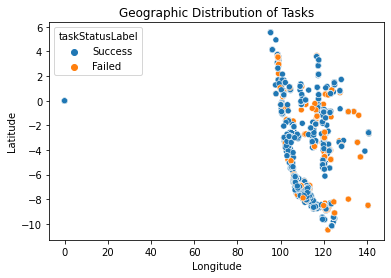

In [26]:
sns.scatterplot(data=df, x='lon', y='lat', hue='taskStatusLabel')
plt.title('Geographic Distribution of Tasks')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
'''
Case when Failed Exist on several location
'''

#### Lat Lon (0,0)

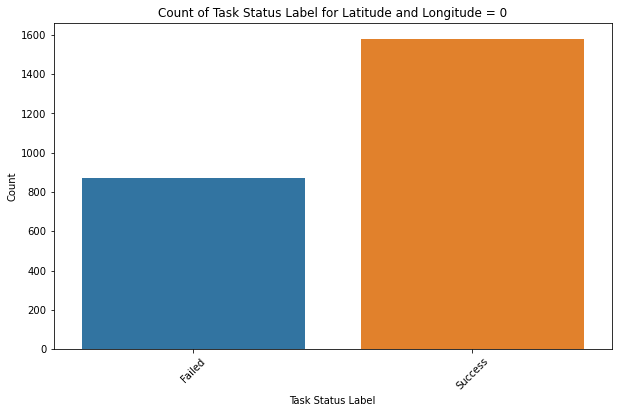

In [27]:
# Filter the DataFrame where latitude and longitude are both 0
filtered_data = df[(df['lat'] == 0) & (df['lon'] == 0)]

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, x='taskStatusLabel')
plt.xlabel('Task Status Label')
plt.ylabel('Count')
plt.title('Count of Task Status Label for Latitude and Longitude = 0')
plt.xticks(rotation=45)
plt.show()


In [28]:
df[(df['lat'] == 0) & (df['lon'] == 0) & (df["taskStatusLabel"]=="Success")]

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,lon,lat,cod_amount,cod_received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,taskStatus_1
1823,2022-11-03 07:23:46 +0700,murkyEggs4,2022-11-03 08:02:25 +0700,done,Delivery,1caf60bc1fdb4c75f38a,0.0,0.0,NaN,NaN,SRG,Success,"KAJEN,KAB.PEKALONGAN",RECEPTIONIST,D02,4.00,CGK,COLF01
2403,2022-11-03 07:23:46 +0700,murkyEggs4,2022-11-03 08:22:08 +0700,done,Delivery,627beb98b700cce025f3,0.0,0.0,NaN,NaN,SRG,Success,"KAJEN,KAB.PEKALONGAN",RECEPTIONIST,D02,1.00,BOO,COLF01
2488,2022-11-03 07:04:32 +0700,innocentDinosaur7,2022-11-03 09:19:50 +0800,done,Delivery,db9bdc965dfb5725fd54,0.0,0.0,NaN,NaN,KOE,Success,None,YANG BERSANGKUTAN,D01,1.00,KOE,COLF01
2508,2022-11-04 10:12:06 +0700,debonairBustard8,2022-11-04 13:57:49 +0700,done,Delivery,3caed72cf0173f1d729f,0.0,0.0,NaN,NaN,CGK,Success,JAKARTA BARAT,KELUARGA/SAUDARA,D09,0.50,CGK,COLF01
2518,2022-11-04 11:05:38 +0700,boastfulPaella0,2022-11-04 13:57:47 +0700,done,Delivery,291df3ba4dc004885502,0.0,0.0,NaN,NaN,CGK,Success,"KELAPA GADING ,JAKAR",RECEPTIONIST,D02,1.00,BKI,COLF01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8325,2022-11-10 08:23:41 +0700,ferventBoa6,2022-11-10 09:38:02 +0700,done,Delivery,a51606c83f1f0d64fbdb,0.0,0.0,NaN,NaN,DJB,Success,"DENDANG,MUARASABAK",YANG BERSANGKUTAN,D01,2.00,CGK,COLF01
8326,2022-11-10 08:37:54 +0700,gutturalLapwing2,2022-11-10 09:38:03 +0700,done,Delivery,ae9cb5cfa113db947621,0.0,0.0,NaN,NaN,DPK,Success,"SUKMAJAYA,DEPOK",YANG BERSANGKUTAN,D01,4.08,CGK,COLF01
8328,2022-11-10 07:46:14 +0700,emptyPretzels3,2022-11-10 09:37:50 +0700,done,Delivery,469a6678ea253784e7e3,0.0,0.0,NaN,NaN,CGK,Success,JAKARTA PUSAT,RECEPTIONIST,D02,1.00,CGK,COLF01
8329,2022-11-10 09:07:12 +0700,debonairPonie1,2022-11-10 09:38:04 +0700,done,Delivery,501af4e040a742e9e878,0.0,0.0,NaN,NaN,CGK,Success,"PALMERAH ,JAKARTA BA",ATASAN/STAFF/KARYAWAN/BAWAHAN,D10,1.00,CGK,COLF01


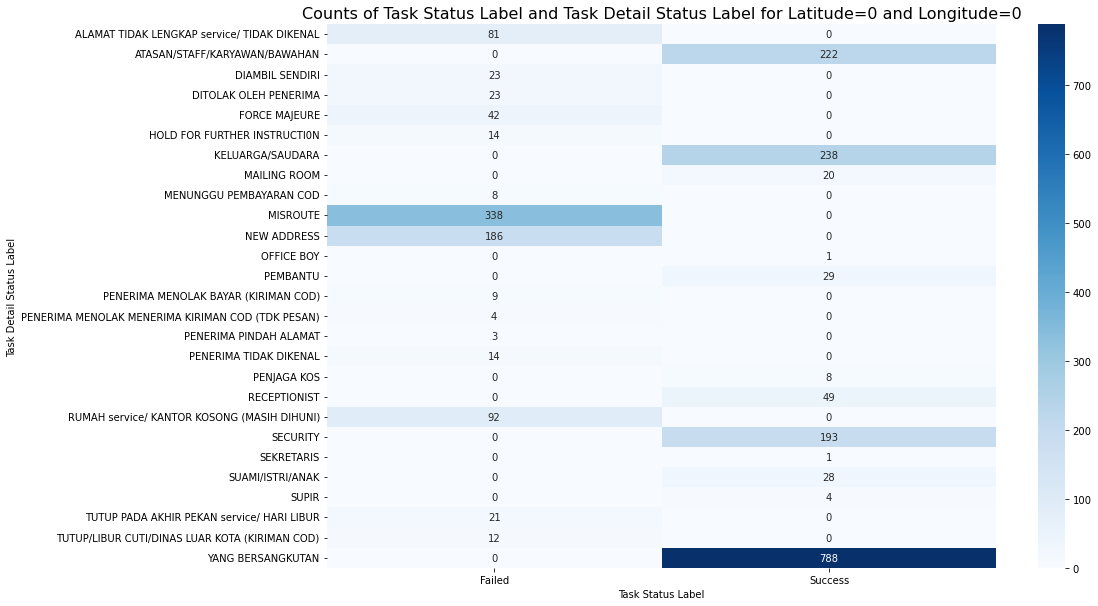

In [29]:
lonlat0 = df[(df['lat'] == 0) & (df['lon'] == 0)]

cross_tab = pd.crosstab(index=lonlat0['taskDetailStatusLabel'], columns=lonlat0['taskStatusLabel'])

plt.figure(figsize=(15, 10))
sns.heatmap(cross_tab, annot=True, cmap='Blues',fmt='d')
plt.xlabel('Task Status Label')
plt.ylabel('Task Detail Status Label')
plt.title('Counts of Task Status Label and Task Detail Status Label for Latitude=0 and Longitude=0',fontsize = 16)
plt.show()

'''
WHEN Lat and Lon is (0,0) :
- most of the FAILED case is Misroute and New Address
- most of the Success case is YANG BERSANGKUTAN, Keluarga/Saudara, and ATASAN/LARYAWAN

'''

In [30]:
lotlan0 = df[(df['lat'] == 0) & (df['lon'] == 0) & (df["taskStatusLabel"]=="Failed")]
lotlan0["taskDetailStatusLabel"].value_counts()

MISROUTE                                             338
NEW ADDRESS                                          186
RUMAH service/ KANTOR KOSONG (MASIH DIHUNI)           92
ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL           81
FORCE MAJEURE                                         42
DIAMBIL SENDIRI                                       23
DITOLAK OLEH PENERIMA                                 23
TUTUP PADA AKHIR PEKAN service/ HARI LIBUR            21
PENERIMA TIDAK DIKENAL                                14
HOLD FOR FURTHER INSTRUCTI0N                          14
TUTUP/LIBUR CUTI/DINAS LUAR KOTA (KIRIMAN COD)        12
PENERIMA MENOLAK BAYAR (KIRIMAN COD)                   9
MENUNGGU PEMBAYARAN COD                                8
PENERIMA MENOLAK MENERIMA KIRIMAN COD (TDK PESAN)      4
PENERIMA PINDAH ALAMAT                                 3
Name: taskDetailStatusLabel, dtype: int64

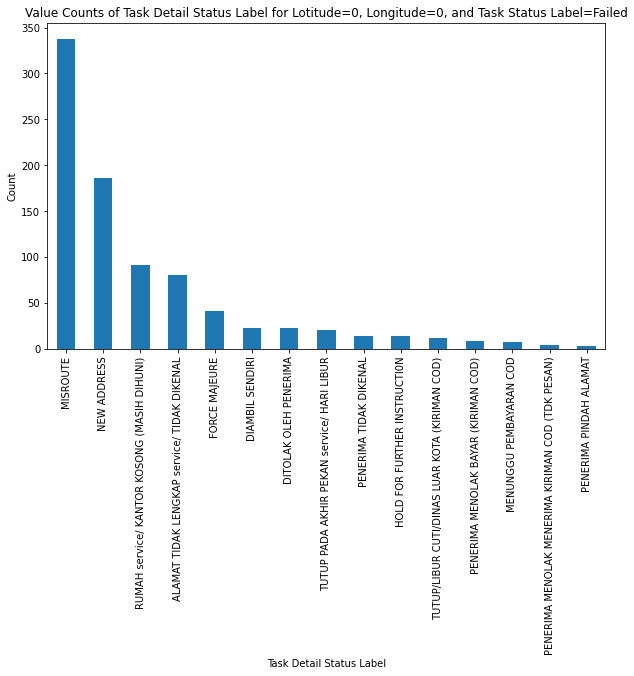

In [31]:
value_counts = lotlan0["taskDetailStatusLabel"].value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot.bar()
plt.xlabel('Task Detail Status Label')
plt.ylabel('Count')
plt.title('Value Counts of Task Detail Status Label for Lotitude=0, Longitude=0, and Task Status Label=Failed')
plt.show()

In [33]:
df["taskStatus"].value_counts()

done       7572
ongoing     762
Name: taskStatus, dtype: int64

In [34]:
df["taskStatusLabel"].value_counts()

Success    5427
Failed     2145
Name: taskStatusLabel, dtype: int64

In [35]:
df.isna().sum()

taskCreatedTime             0
taskAssignedTo              1
taskCompletedTime         768
taskStatus                  0
flow                        0
taskId                      0
lon                       768
lat                       768
cod_amount               5976
cod_received             5976
branch_dest                 0
taskStatusLabel           762
receiver_city              52
taskDetailStatusLabel     762
taskDetailStatus          762
weight                      0
branch_origin             293
taskStatus_1              762
dtype: int64

In [36]:
## input Nan lot lan with 0
df[df["lat"].isna()]

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,lon,lat,cod_amount,cod_received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,taskStatus_1
550,2022-11-01 15:04:06 +0700,mildCardinal0,NaN,done,Delivery,9779ae5b5f88ba0bf31c,NaN,NaN,NaN,NaN,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,3.00,CGK,COLF01
551,2022-11-01 16:59:58 +0700,mildCardinal0,NaN,done,Delivery,8ade827b1e3530c02e82,NaN,NaN,NaN,NaN,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,4.90,CGK,COLF01
552,2022-11-01 16:59:58 +0700,mildCardinal0,NaN,done,Delivery,292b1e9f73099dac1209,NaN,NaN,NaN,NaN,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,8.00,CGK,COLF01
553,2022-11-01 16:59:58 +0700,mildCardinal0,NaN,done,Delivery,7e8862b3f4010465f006,NaN,NaN,NaN,NaN,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,17.00,BDO,COLF01
554,2022-11-01 10:13:02 +0700,mildCardinal0,NaN,done,Delivery,a4fb8aed363abc3d6af3,NaN,NaN,NaN,NaN,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,1.00,CGK,COLF01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7954,2022-11-10 09:31:47 +0700,yearningOrange7,NaN,ongoing,Delivery,0247c7beef13f9d2fd7e,NaN,NaN,178000.0,False,BKI,NaN,"BABELAN,CIKARANG",NaN,NaN,1.00,CGK,NaN
7992,2022-11-10 09:31:53 +0700,relievedIguana0,NaN,ongoing,Delivery,abe2c1babb7feef85fda,NaN,NaN,275010.0,False,MDC,NaN,MELONGUANE,NaN,NaN,1.00,CGK,NaN
8002,2022-11-10 09:32:08 +0700,mellowPolenta1,NaN,ongoing,Delivery,d6ce7905450324498c30,NaN,NaN,NaN,NaN,DPK,NaN,"CINERE,DEPOK",NaN,NaN,4.35,CGK,NaN
8007,2022-11-10 09:32:07 +0700,pacifiedThrush4,NaN,ongoing,Delivery,d3db332e6196498e781d,NaN,NaN,269000.0,False,PDG,NaN,"GUNUNG TALANG,AROSUK",NaN,NaN,1.00,CGK,NaN


Input Lat Lon (0,0) with 0

In [37]:
#Input Nan Value on lat lon with 0
df['lat'] = df['lat'].fillna(0)
df['lon'] = df['lon'].fillna(0)
df

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,lon,lat,cod_amount,cod_received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,taskStatus_1
0,2022-11-01 20:17:26 +0700,pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13.000,CGK,COLF01
1,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.300,CGK,COLF01
2,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3.000,CGK,COLF01
3,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01
4,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562.0,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3.000,CGK,COLF01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,2022-11-10 09:07:12 +0700,debonairPonie1,2022-11-10 09:38:04 +0700,done,Delivery,501af4e040a742e9e878,0.000000,0.000000,NaN,NaN,CGK,Success,"PALMERAH ,JAKARTA BA",ATASAN/STAFF/KARYAWAN/BAWAHAN,D10,1.000,CGK,COLF01
8330,2022-11-10 09:21:42 +0700,murkyThrushe3,2022-11-10 09:37:52 +0700,done,Delivery,5cc952d9e9f8066dbf24,110.352054,-7.892571,NaN,NaN,JOG,Failed,KOTA BANTUL,ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL,U01,1.000,TGR,COLF02
8331,2022-11-10 09:36:44 +0700,enragedCake7,2022-11-10 09:37:55 +0700,done,Delivery,1b136b5a3c60749eb571,105.664897,-5.359063,NaN,NaN,TKG,Success,MARGA SEKAMPUNG KAB.,YANG BERSANGKUTAN,D01,1.440,CGK,COLF01
8332,2022-11-10 07:25:40 +0700,lyingPaella2,2022-11-10 10:37:53 +0800,done,Delivery,e92e813c8539080c922e,119.877173,-8.513305,151000.0,False,KOE,Failed,"KOMODO,LABUAN BAJO",PENERIMA PINDAH ALAMAT,U03,0.600,CGK,COLF02


### 2. COD

#### COD Status

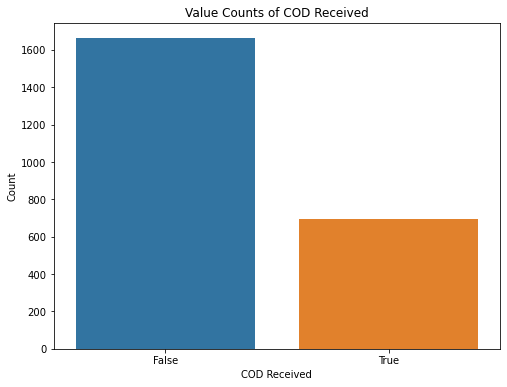

In [38]:
# Get the value counts of 'cod_received'
cod_received_counts = df["cod_received"].value_counts()

# Plot the value counts
plt.figure(figsize=(8, 6))
sns.barplot(x=cod_received_counts.index, y=cod_received_counts.values)
plt.xlabel('COD Received')
plt.ylabel('Count')
plt.title('Value Counts of COD Received')
plt.show()

In [39]:
#check null
df["cod_received"].isna().sum()

5976

In [40]:
# Impute Nan on cod_received
df['cod_received'].fillna('No applicable', inplace=True)


##### COD Status and Task Status Label Detail

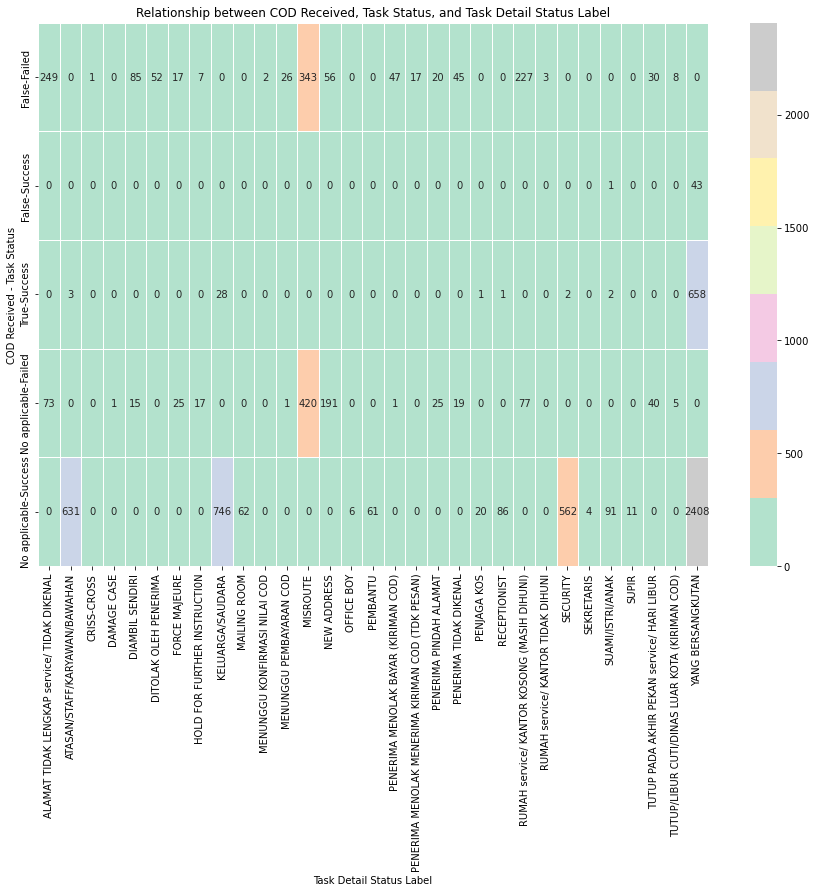

In [41]:
# Create a cross-tabulation of 'cod_received', 'taskStatusLabel', and 'taskDetailStatusLabel'
cross_tab = pd.crosstab(index=[df['cod_received'], df['taskStatusLabel']], columns=df['taskDetailStatusLabel'])

# Create a heatmap of the cross-tabulation
plt.figure(figsize=(15, 10))
sns.heatmap(cross_tab, annot=True, cmap='Pastel2', fmt='d', linewidths=0.5)

plt.xlabel('Task Detail Status Label')
plt.ylabel('COD Received - Task Status')
plt.title('Relationship between COD Received, Task Status, and Task Detail Status Label')
plt.show()


'''
From figure above we can see that most of trasaction not using COD system 5976 using NON-COD (Non applicable)

Customer when using COD mostly pachkage recieved by YANG BERSANGKUTAN

'''

In [43]:
df[(df["cod_received"].isna()) & (df["taskStatus"]=='done')]

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,lon,lat,cod_amount,cod_received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,taskStatus_1


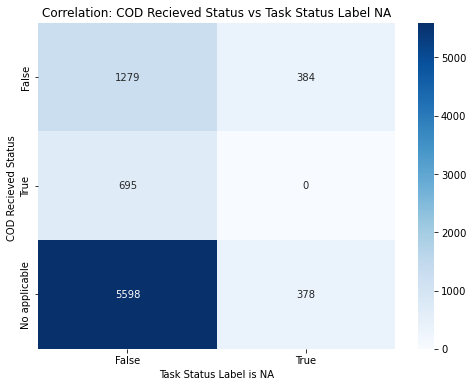

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a cross-tabulation table
cross_tab = pd.crosstab(df['cod_received'], df['taskStatusLabel'].isna())

# Plot the cross-tabulation table as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt="d")
plt.xlabel('Task Status Label is NA')
plt.ylabel('COD Recieved Status ')
plt.title('Correlation: COD Recieved Status vs Task Status Label NA')
plt.show()


#### COD Amount

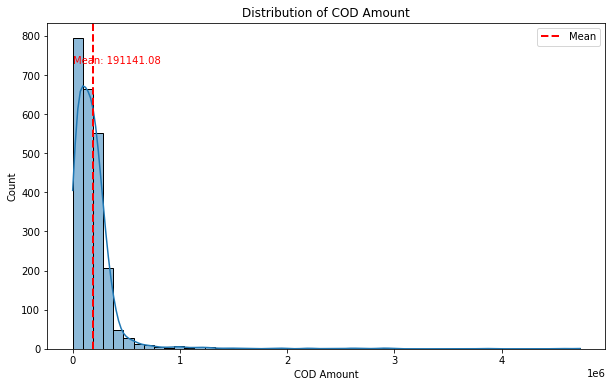

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='cod_amount', bins=50, kde=True)
plt.axvline(df['cod_amount'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
plt.xlabel('COD Amount')
plt.ylabel('Count')
plt.title('Distribution of COD Amount')
plt.legend()

# Add text annotation for the mean value
mean_value = df['cod_amount'].mean()
plt.text(0.95, plt.ylim()[1]*0.9, f'Mean: {mean_value:.2f}', color='red', ha='left', va='top')

plt.show()


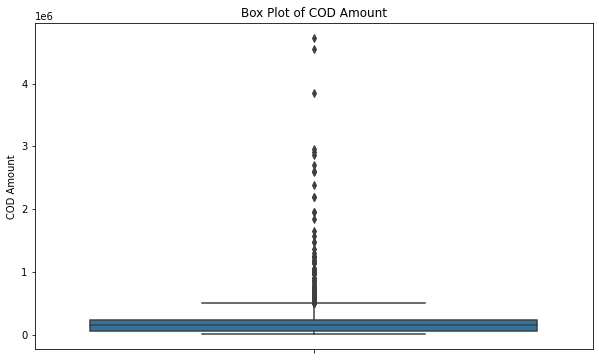

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='cod_amount')
plt.ylabel('COD Amount')
plt.title('Box Plot of COD Amount')
plt.show()


##### COD Amount and Task Status

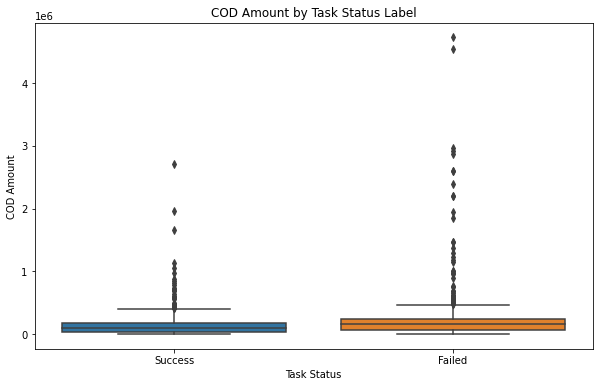

In [47]:
# Box plot of 'cod_amount' by 'taskStatus'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='taskStatusLabel', y='cod_amount')
plt.xlabel('Task Status')
plt.ylabel('COD Amount')
plt.title('COD Amount by Task Status Label')
plt.show()


In [48]:
df.groupby('taskStatusLabel')['cod_amount'].quantile([0.25, 0.5, 0.75,0.98]).unstack()


,0.25,0.50,0.75,0.98
taskStatusLabel,,,,
Failed,71563.0,158000.0,232975.0,757670.0
Success,39670.5,93400.0,182875.0,615100.0


In [49]:
df.groupby('taskStatusLabel')['cod_amount'].mean()

taskStatusLabel
Failed     200683.561134
Success    139152.680650
Name: cod_amount, dtype: float64

In [50]:
cod_q98 = df[(df['cod_amount'] > 757670) & (df['taskStatusLabel'] == 'Failed')]


### 3. Task Status

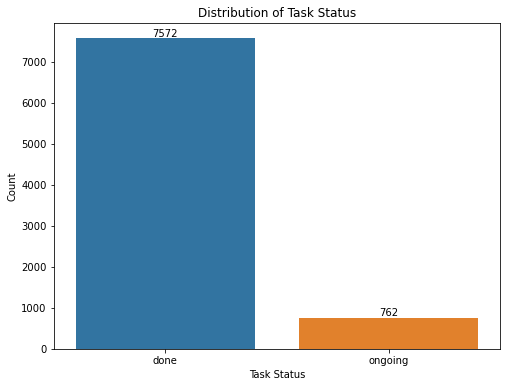

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the count of each task status
status_counts = df['taskStatus'].value_counts()

# Create a countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='taskStatus')
plt.xlabel('Task Status')
plt.ylabel('Count')
plt.title('Distribution of Task Status')

# Add count values above each bar
for i, count in enumerate(status_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


In [52]:
df['taskStatus'].value_counts()
 

done       7572
ongoing     762
Name: taskStatus, dtype: int64

In [53]:
df['taskDetailStatusLabel'].value_counts()

YANG BERSANGKUTAN                                    3109
KELUARGA/SAUDARA                                      774
MISROUTE                                              763
ATASAN/STAFF/KARYAWAN/BAWAHAN                         634
SECURITY                                              564
ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL           322
RUMAH service/ KANTOR KOSONG (MASIH DIHUNI)           304
NEW ADDRESS                                           247
DIAMBIL SENDIRI                                       100
SUAMI/ISTRI/ANAK                                       94
RECEPTIONIST                                           87
TUTUP PADA AKHIR PEKAN service/ HARI LIBUR             70
PENERIMA TIDAK DIKENAL                                 64
MAILING ROOM                                           62
PEMBANTU                                               61
DITOLAK OLEH PENERIMA                                  52
PENERIMA MENOLAK BAYAR (KIRIMAN COD)                   48
PENERIMA PINDA

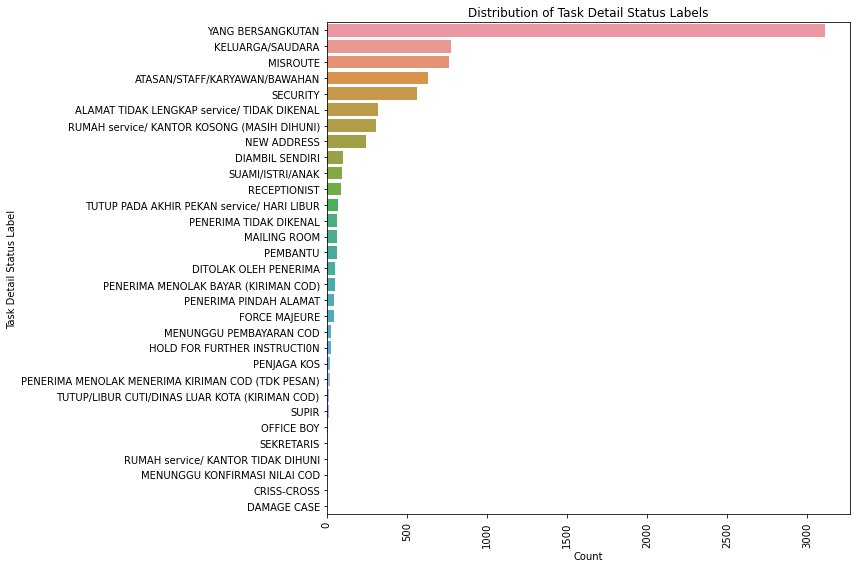

In [54]:

# Calculate the frequency counts of each category
category_counts = df['taskDetailStatusLabel'].value_counts()

# Sort the categories based on their counts in descending order
sorted_categories = category_counts.index.tolist()

# Create a count plot of 'taskDetailStatusLabel' with sorted categories
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='taskDetailStatusLabel', order=sorted_categories)
plt.ylabel('Task Detail Status Label')
plt.xlabel('Count')
plt.title('Distribution of Task Detail Status Labels')

# Increase the rotation angle of the y-axis labels
plt.xticks(rotation=90)

# Adjust spacing to prevent overlapping labels
plt.tight_layout()

plt.show()


#### Task status Label and Task Detail Status Label

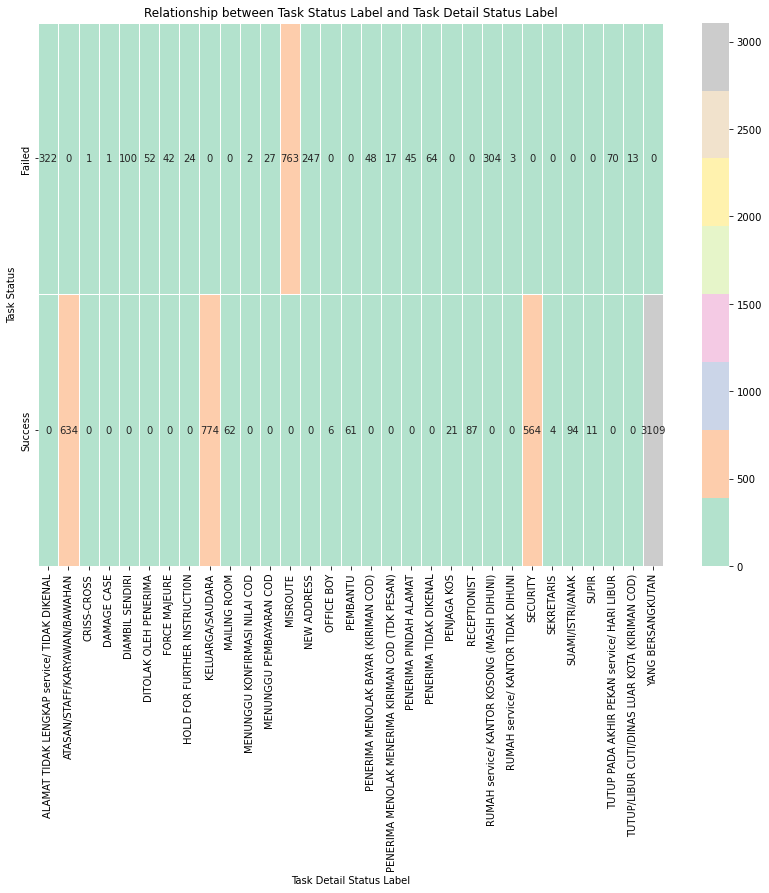

In [55]:
# Create a cross-tabulation of 'taskStatusLabel' and 'taskDetailStatusLabel'
cross_tab = pd.crosstab(df['taskStatusLabel'], df['taskDetailStatusLabel'])

# Create a heatmap of the cross-tabulation
plt.figure(figsize=(14, 10))
sns.heatmap(cross_tab, annot=True, cmap='Pastel2', fmt='d', linewidths=0.5)
plt.xlabel('Task Detail Status Label')
plt.ylabel('Task Status')
plt.title('Relationship between Task Status Label and Task Detail Status Label')
plt.show()


In [ ]:
'''
Most FAILED case is by Missroute, Rumah/kantor/TIDAK DIHUNI, NEW ADDRESS

'''

In [56]:
df['cod_received'].value_counts()

No applicable    5976
False            1663
True              695
Name: cod_received, dtype: int64

In [57]:
df['cod_received'].isna().sum()

0

In [58]:
df['taskStatusLabel'].value_counts()

Success    5427
Failed     2145
Name: taskStatusLabel, dtype: int64

#### Task status and COD

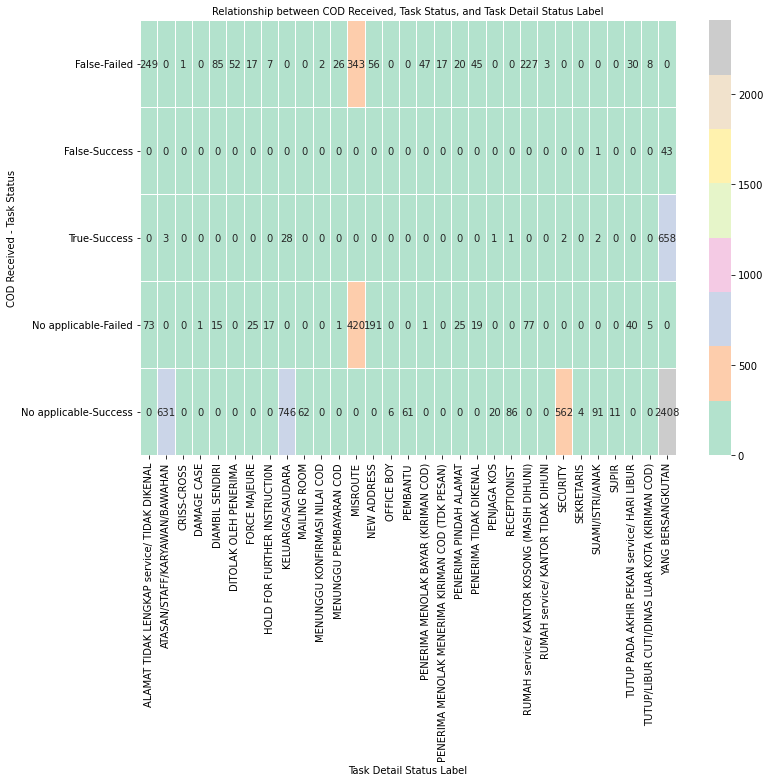

In [59]:
# Create a cross-tabulation of 'cod_received', 'taskStatus', and 'taskDetailStatusLabel'
cross_tab = pd.crosstab(index=[df['cod_received'], df['taskStatusLabel']], columns=df['taskDetailStatusLabel'])

# Create a heatmap of the cross-tabulation
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, cmap='Pastel2', fmt='d', linewidths=0.5)
plt.xlabel('Task Detail Status Label')
plt.ylabel('COD Received - Task Status')
plt.title('Relationship between COD Received, Task Status, and Task Detail Status Label', fontsize =10)
plt.show()


'''

From figure above we can see that:

- most of trasaction not using COD with FAILED status are Missroute,RUMAH KOSONG,  Diambil Sendiri

- most of trasaction not using COD with SUCCESS status is YANG BERSANGKUTAN

- Not using COD with FAILED status mostly because Missroute and new address

- Not using COD with SUCCESS status mostly by YANG BERSANGKUTAN, DIAMBIL SENDIRI, Keluarga, ATASAN/KARYAWAN



'''

### 4. Weight

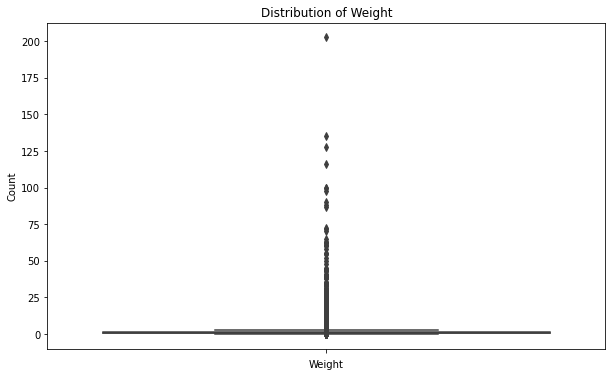

In [60]:
# Create a histogram
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='weight')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.title('Distribution of Weight')
plt.show()

In [61]:
# df.groupby('taskStatusLabel')['cod_amount'].quantile([0.25, 0.5, 0.75,0.98]).unstack()
df['weight'].quantile([0.25, 0.5, 0.75,0.99])


0.25     1.0000
0.50     1.0000
0.75     1.6000
0.99    22.8878
Name: weight, dtype: float64

In [62]:
df[df["weight"]>20]

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,lon,lat,cod_amount,cod_received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,taskStatus_1
165,2022-11-01 12:31:12 +0700,somberOcelot3,2022-11-01 13:37:49 +0700,done,Delivery,b5cabeeeab088d6b50a9,107.449274,-6.946676,610000.0,True,BDO,Success,"CILILIN,NGAMPRAH",YANG BERSANGKUTAN,D01,31.208,CGK,COLF01
869,2022-11-02 08:08:52 +0700,spiritedCardinal2,2022-11-02 08:10:29 +0700,done,Delivery,0d7901bd53eba331f04a,103.847116,-2.893538,NaN,No applicable,PLM,Failed,"SEKAYU,KAB.MUSI BANY",RUMAH service/ KANTOR KOSONG (MASIH DIHUNI),U05,48.048,CGK,COLF02
911,2022-11-02 08:09:52 +0700,artisticPolenta8,2022-11-02 08:10:29 +0700,done,Delivery,2ca763286f99e0d1e89c,103.847110,-2.893539,NaN,No applicable,PLM,Failed,"SEKAYU,KAB.MUSI BANY",DIAMBIL SENDIRI,CR3,116.000,CGK,COLF02
981,2022-11-02 08:12:50 +0700,eagerThrush5,2022-11-02 08:13:16 +0700,done,Delivery,b4cf538dec8f1fe4ad67,104.112002,-2.593567,NaN,No applicable,PLM,Success,"SUNGAI LILIN,SEKAYU",YANG BERSANGKUTAN,D01,20.500,CGK,COLF01
1149,2022-11-02 07:37:45 +0700,curiousPonie1,2022-11-02 08:38:36 +0800,done,Delivery,04a419a84159d8b26ccb,114.661971,-3.447025,NaN,No applicable,BDJ,Success,BANJARBARU,ATASAN/STAFF/KARYAWAN/BAWAHAN,D10,21.839,CGK,COLF01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8061,2022-11-10 09:15:13 +0700,wakefulDoves2,2022-11-10 10:32:11 +0800,done,Delivery,449bbfb7ab8ce9ca2fdc,0.000000,0.000000,NaN,No applicable,SMD,Success,SAMARINDA ULU,YANG BERSANGKUTAN,D01,22.500,CGK,COLF01
8157,2022-11-10 07:33:05 +0700,pleasedBoa3,2022-11-10 08:57:00 +0700,done,Delivery,2310d35f82c6167e1948,0.000000,0.000000,NaN,No applicable,MJK,Success,"NGANJUK,KAB. NGANJUK",YANG BERSANGKUTAN,D01,20.020,CGK,COLF01
8190,2022-11-10 08:54:32 +0700,finickyPie7,2022-11-10 08:57:04 +0700,done,Delivery,cc4ccd18924d88c12215,111.679438,-8.079674,4553000.0,False,SUB,Failed,"PULE, TRENGGALEK",PENERIMA MENOLAK BAYAR (KIRIMAN COD),U08,62.160,CGK,COLF02
8229,2022-11-10 09:34:45 +0700,boredEggs2,2022-11-10 09:37:51 +0700,done,Delivery,3f2f36385bb61e75d56d,104.478694,0.894101,NaN,No applicable,TNJ,Success,"BUKIT BESTARI, TANJU",YANG BERSANGKUTAN,D01,63.000,CGK,COLF01


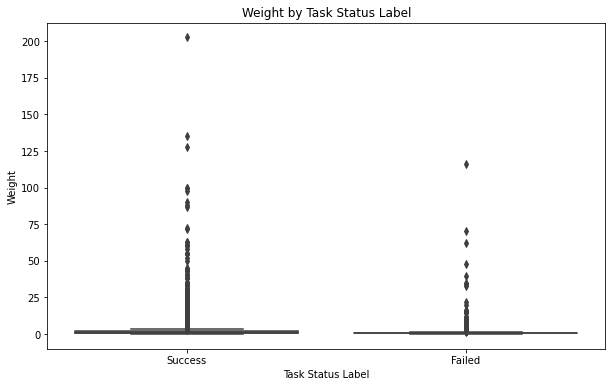

In [63]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='taskStatusLabel', y='weight')
plt.xlabel('Task Status Label')
plt.ylabel('Weight')
plt.title('Weight by Task Status Label')
plt.show()


In [64]:
df.groupby('taskStatusLabel')['weight'].quantile([0.25, 0.5, 0.75,0.98]).unstack()


,0.25,0.50,0.75,0.98
taskStatusLabel,,,,
Failed,0.55,1.0,1.0,7.512
Success,1.00,1.0,2.0,19.000


In [65]:
df[df['weight'] > 100]

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,lon,lat,cod_amount,cod_received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,taskStatus_1
911,2022-11-02 08:09:52 +0700,artisticPolenta8,2022-11-02 08:10:29 +0700,done,Delivery,2ca763286f99e0d1e89c,103.847110,-2.893539,NaN,No applicable,PLM,Failed,"SEKAYU,KAB.MUSI BANY",DIAMBIL SENDIRI,CR3,116.0,CGK,COLF02
2553,2022-11-04 13:50:58 +0700,guiltyClam6,2022-11-04 13:57:46 +0700,done,Delivery,a5d522a62988a99c60b8,0.000000,0.000000,NaN,No applicable,MES,Success,"BABALAN,PANGKALAN BR",YANG BERSANGKUTAN,D01,202.5,CGK,COLF01
4553,2022-11-06 08:09:06 +0700,aloofLizard4,2022-11-06 08:14:19 +0700,done,Delivery,564e85954346111b987a,100.736817,1.683525,NaN,No applicable,PKU,Success,"BANGKO PUSAKO, KAB R",YANG BERSANGKUTAN,D01,128.0,CGK,COLF01
6166,2022-11-08 07:30:33 +0700,fondTruffle0,2022-11-08 08:39:28 +0800,done,Delivery,14305b9d9443c41de216,120.345467,-2.553612,NaN,No applicable,UPG,Success,"MASAMBA,KAB.LUWU UTA",YANG BERSANGKUTAN,D01,135.0,UPG,COLF01


### Task Assign to

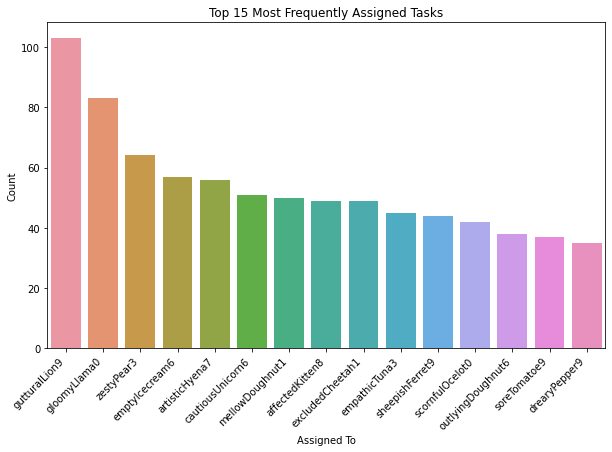

In [66]:
# Get the top 10 most frequently assigned tasks
top_10_assigned = df['taskAssignedTo'].value_counts().head(15)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_assigned.index, y=top_10_assigned.values)
plt.xlabel('Assigned To')
plt.ylabel('Count')
plt.title('Top 15 Most Frequently Assigned Tasks')
plt.xticks(rotation=45, ha='right')
plt.show()

In [67]:
df

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,lon,lat,cod_amount,cod_received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,taskStatus_1
0,2022-11-01 20:17:26 +0700,pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13.000,CGK,COLF01
1,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.300,CGK,COLF01
2,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3.000,CGK,COLF01
3,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01
4,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562.0,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3.000,CGK,COLF01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,2022-11-10 09:07:12 +0700,debonairPonie1,2022-11-10 09:38:04 +0700,done,Delivery,501af4e040a742e9e878,0.000000,0.000000,NaN,No applicable,CGK,Success,"PALMERAH ,JAKARTA BA",ATASAN/STAFF/KARYAWAN/BAWAHAN,D10,1.000,CGK,COLF01
8330,2022-11-10 09:21:42 +0700,murkyThrushe3,2022-11-10 09:37:52 +0700,done,Delivery,5cc952d9e9f8066dbf24,110.352054,-7.892571,NaN,No applicable,JOG,Failed,KOTA BANTUL,ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL,U01,1.000,TGR,COLF02
8331,2022-11-10 09:36:44 +0700,enragedCake7,2022-11-10 09:37:55 +0700,done,Delivery,1b136b5a3c60749eb571,105.664897,-5.359063,NaN,No applicable,TKG,Success,MARGA SEKAMPUNG KAB.,YANG BERSANGKUTAN,D01,1.440,CGK,COLF01
8332,2022-11-10 07:25:40 +0700,lyingPaella2,2022-11-10 10:37:53 +0800,done,Delivery,e92e813c8539080c922e,119.877173,-8.513305,151000.0,False,KOE,Failed,"KOMODO,LABUAN BAJO",PENERIMA PINDAH ALAMAT,U03,0.600,CGK,COLF02


#### Assigned To and Task Status Label

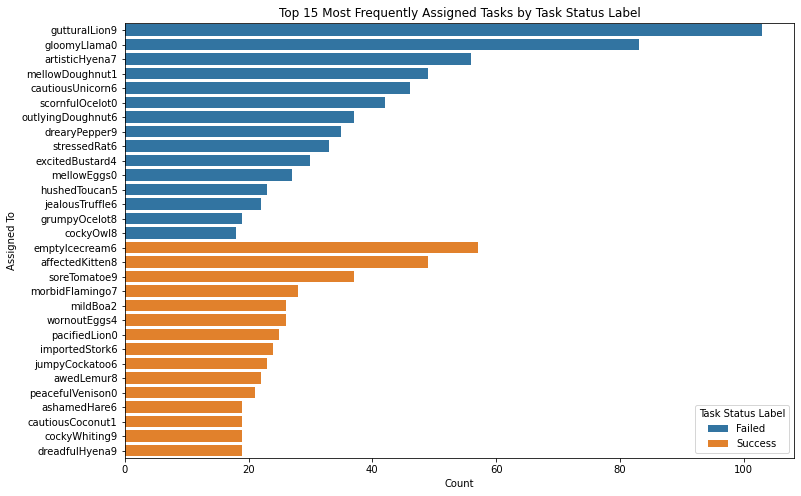

In [68]:
# Get the top 10 most frequently assigned tasks for each task status label
top_10_assigned = df.groupby('taskStatusLabel')['taskAssignedTo'].value_counts().groupby(level=0).head(15).reset_index(name='count')

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_assigned, x='count', y='taskAssignedTo', hue='taskStatusLabel', orient='horizontal', dodge=False)
plt.xlabel('Count')
plt.ylabel('Assigned To')
plt.title('Top 15 Most Frequently Assigned Tasks by Task Status Label')
plt.legend(title='Task Status Label')
plt.show()

In [69]:
df

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,lon,lat,cod_amount,cod_received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,taskStatus_1
0,2022-11-01 20:17:26 +0700,pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13.000,CGK,COLF01
1,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.300,CGK,COLF01
2,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3.000,CGK,COLF01
3,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01
4,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562.0,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3.000,CGK,COLF01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,2022-11-10 09:07:12 +0700,debonairPonie1,2022-11-10 09:38:04 +0700,done,Delivery,501af4e040a742e9e878,0.000000,0.000000,NaN,No applicable,CGK,Success,"PALMERAH ,JAKARTA BA",ATASAN/STAFF/KARYAWAN/BAWAHAN,D10,1.000,CGK,COLF01
8330,2022-11-10 09:21:42 +0700,murkyThrushe3,2022-11-10 09:37:52 +0700,done,Delivery,5cc952d9e9f8066dbf24,110.352054,-7.892571,NaN,No applicable,JOG,Failed,KOTA BANTUL,ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL,U01,1.000,TGR,COLF02
8331,2022-11-10 09:36:44 +0700,enragedCake7,2022-11-10 09:37:55 +0700,done,Delivery,1b136b5a3c60749eb571,105.664897,-5.359063,NaN,No applicable,TKG,Success,MARGA SEKAMPUNG KAB.,YANG BERSANGKUTAN,D01,1.440,CGK,COLF01
8332,2022-11-10 07:25:40 +0700,lyingPaella2,2022-11-10 10:37:53 +0800,done,Delivery,e92e813c8539080c922e,119.877173,-8.513305,151000.0,False,KOE,Failed,"KOMODO,LABUAN BAJO",PENERIMA PINDAH ALAMAT,U03,0.600,CGK,COLF02


#### Assigned To and Task Status Detail Label by Task Status Label

In [70]:
df[(df['taskStatus']=="ongoing") ]

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,lon,lat,cod_amount,cod_received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,taskStatus_1
680,2022-11-02 08:06:34 +0700,vengefulCheese4,NaN,ongoing,Delivery,0bed2d5cd82456af0239,0.0,0.0,NaN,No applicable,MES,NaN,"DOLOK PANRIBUAN,SIMA",NaN,NaN,1.00,CGK,NaN
684,2022-11-02 08:06:34 +0700,vengefulCheese4,NaN,ongoing,Delivery,3e9117e0d978e79e02e9,0.0,0.0,NaN,No applicable,MES,NaN,"SIANTAR TIMUR,PEMATA",NaN,NaN,1.00,MES,NaN
685,2022-11-02 08:06:34 +0700,vengefulCheese4,NaN,ongoing,Delivery,898eb4f04d5eb328ed94,0.0,0.0,550000.0,False,MES,NaN,"SIANTAR TIMUR,PEMATA",NaN,NaN,1.00,SOC,NaN
686,2022-11-02 08:06:34 +0700,vengefulCheese4,NaN,ongoing,Delivery,eafd37c5536bc45e5a43,0.0,0.0,NaN,No applicable,MES,NaN,"SIANTAR TIMUR,PEMATA",NaN,NaN,1.00,MES,NaN
687,2022-11-02 08:06:34 +0700,vengefulCheese4,NaN,ongoing,Delivery,d59413b44eb9878eca66,0.0,0.0,NaN,No applicable,MES,NaN,"SIANTAR BARAT,PEMATA",NaN,NaN,1.00,PDG,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7954,2022-11-10 09:31:47 +0700,yearningOrange7,NaN,ongoing,Delivery,0247c7beef13f9d2fd7e,0.0,0.0,178000.0,False,BKI,NaN,"BABELAN,CIKARANG",NaN,NaN,1.00,CGK,NaN
7992,2022-11-10 09:31:53 +0700,relievedIguana0,NaN,ongoing,Delivery,abe2c1babb7feef85fda,0.0,0.0,275010.0,False,MDC,NaN,MELONGUANE,NaN,NaN,1.00,CGK,NaN
8002,2022-11-10 09:32:08 +0700,mellowPolenta1,NaN,ongoing,Delivery,d6ce7905450324498c30,0.0,0.0,NaN,No applicable,DPK,NaN,"CINERE,DEPOK",NaN,NaN,4.35,CGK,NaN
8007,2022-11-10 09:32:07 +0700,pacifiedThrush4,NaN,ongoing,Delivery,d3db332e6196498e781d,0.0,0.0,269000.0,False,PDG,NaN,"GUNUNG TALANG,AROSUK",NaN,NaN,1.00,CGK,NaN


In [71]:
df[(df['taskStatus']=="ongoing") & (df['taskStatusLabel'].isna())]

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,lon,lat,cod_amount,cod_received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,taskStatus_1
680,2022-11-02 08:06:34 +0700,vengefulCheese4,NaN,ongoing,Delivery,0bed2d5cd82456af0239,0.0,0.0,NaN,No applicable,MES,NaN,"DOLOK PANRIBUAN,SIMA",NaN,NaN,1.00,CGK,NaN
684,2022-11-02 08:06:34 +0700,vengefulCheese4,NaN,ongoing,Delivery,3e9117e0d978e79e02e9,0.0,0.0,NaN,No applicable,MES,NaN,"SIANTAR TIMUR,PEMATA",NaN,NaN,1.00,MES,NaN
685,2022-11-02 08:06:34 +0700,vengefulCheese4,NaN,ongoing,Delivery,898eb4f04d5eb328ed94,0.0,0.0,550000.0,False,MES,NaN,"SIANTAR TIMUR,PEMATA",NaN,NaN,1.00,SOC,NaN
686,2022-11-02 08:06:34 +0700,vengefulCheese4,NaN,ongoing,Delivery,eafd37c5536bc45e5a43,0.0,0.0,NaN,No applicable,MES,NaN,"SIANTAR TIMUR,PEMATA",NaN,NaN,1.00,MES,NaN
687,2022-11-02 08:06:34 +0700,vengefulCheese4,NaN,ongoing,Delivery,d59413b44eb9878eca66,0.0,0.0,NaN,No applicable,MES,NaN,"SIANTAR BARAT,PEMATA",NaN,NaN,1.00,PDG,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7954,2022-11-10 09:31:47 +0700,yearningOrange7,NaN,ongoing,Delivery,0247c7beef13f9d2fd7e,0.0,0.0,178000.0,False,BKI,NaN,"BABELAN,CIKARANG",NaN,NaN,1.00,CGK,NaN
7992,2022-11-10 09:31:53 +0700,relievedIguana0,NaN,ongoing,Delivery,abe2c1babb7feef85fda,0.0,0.0,275010.0,False,MDC,NaN,MELONGUANE,NaN,NaN,1.00,CGK,NaN
8002,2022-11-10 09:32:08 +0700,mellowPolenta1,NaN,ongoing,Delivery,d6ce7905450324498c30,0.0,0.0,NaN,No applicable,DPK,NaN,"CINERE,DEPOK",NaN,NaN,4.35,CGK,NaN
8007,2022-11-10 09:32:07 +0700,pacifiedThrush4,NaN,ongoing,Delivery,d3db332e6196498e781d,0.0,0.0,269000.0,False,PDG,NaN,"GUNUNG TALANG,AROSUK",NaN,NaN,1.00,CGK,NaN


In [72]:
import plotly.graph_objects as go

def heatmp(data,StatusLabel, top) :

    # Filter the data 
    filtered_df = data[data['taskStatusLabel'] == StatusLabel]

    # Get the top 10 taskAssignedTo values
    top_10_task_assigned = filtered_df['taskAssignedTo'].value_counts().nlargest(top)

    # Filter the data based on the top 10 taskAssignedTo values
    filtered_data = filtered_df[filtered_df['taskAssignedTo'].isin(top_10_task_assigned.index)]

    # Create a grouped count dataframe
    grouped_counts = filtered_data.groupby(['taskAssignedTo', 'taskDetailStatusLabel']).size().reset_index(name='count')

    # Create a trace for the heatmap
    trace = go.Heatmap(
        x=grouped_counts['taskAssignedTo'], #This represents the values to be displayed on the x-axis of the heatmap.
        y=grouped_counts['taskDetailStatusLabel'], #This represents the values to be displayed on the y-axis of the heatmap.
        z=grouped_counts['count'], #This represents the values that determine the color of each cell in the heatmap
        colorscale='Viridis',
        text=grouped_counts['count'],  # Show count in the heatmap cells
        # hoverinfo='text',
        hovertemplate='Task Assigned To: %{x}<br>Task Detail Status Label: %{y}<br>Count: %{z}', #Plotly allows you to customize the tooltip text that appears when hovering over data points in a plot
    )

    # Create the layout
    layout = go.Layout(
        title=f'Relationship between Task Assigned To and Task Detail Status Label where <b>Task Status Label is {StatusLabel}</b> (Top {top})',
        xaxis=dict(title='Task Assigned To'),
        yaxis=dict(title='Task Detail Status Label'),
    )

    # Create the figure
    fig = go.Figure(data=[trace], layout=layout)

    # Show the figure
    fig.show()


In [73]:
heatmp(df,"Failed",15)

From Figure above we can conclude that Most Assigned is Failed to deliver the package because New Addres and Missroute

In [74]:
heatmp(df,"Success",15)


From Figure above we can conclude that Most Assigned is SUCCESS to deliver the package are received by Yang bersangkutan

### Branch Origin

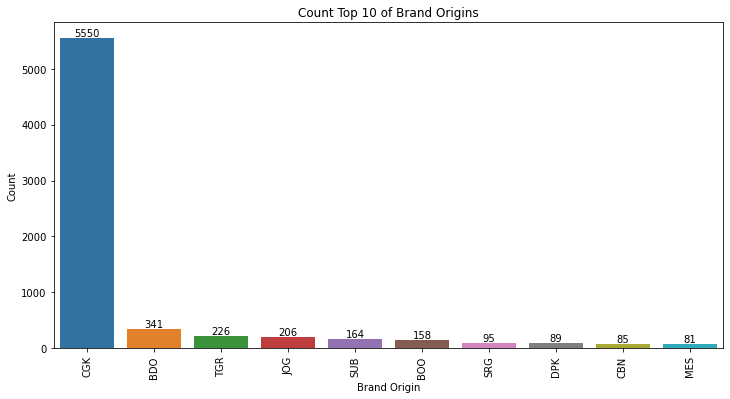

In [75]:
# Count the occurrences of each brand origin
brand_origin_counts = df['branch_origin'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=brand_origin_counts.index, y=brand_origin_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Brand Origin')
plt.ylabel('Count')
plt.title('Count Top 10 of Brand Origins')

# Add count values as text annotations
for i, count in enumerate(brand_origin_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

<Figure size 1440x720 with 0 Axes>

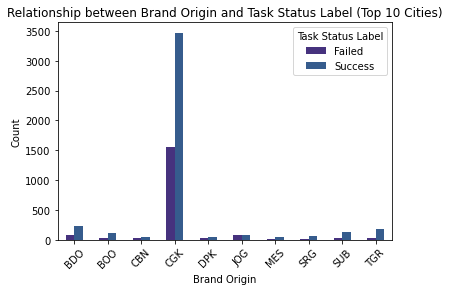

In [76]:

# Get the top 10 cities based on count
top_10_cities = df['branch_origin'].value_counts().nlargest(10).index

# Filter the data based on the top 10 cities
filtered_df = df[df['branch_origin'].isin(top_10_cities)]

# Group the data by brand origin and task status label
grouped_df = filtered_df.groupby(['branch_origin', 'taskStatusLabel']).size().unstack(fill_value=0)

# Set the figure size
plt.figure(figsize=(20, 10))

# Create the stacked bar chart
sns.set_palette("viridis") # Set the color palette
grouped_df.plot(kind='bar', stacked=False)

# Set the x-axis label and rotate the tick labels for better visibility
plt.xlabel('Brand Origin')
plt.xticks(rotation=45)

# Set the y-axis label
plt.ylabel('Count')

# Set the plot title
plt.title('Relationship between Brand Origin and Task Status Label (Top 10 Cities)')

# Show the legend
plt.legend(title='Task Status Label')

# Display the plot
plt.show()


#### Branch and Task Status

In [77]:
def heatmap_taskStat(taskLabel, column_analysis, top ):
    
    # Filter the data for taskStatusLabel is "Failed"
    filtered_df = df[df['taskStatusLabel'] == taskLabel]

    # Count the occurrences of each receiver city
    receiver_counts = filtered_df[column_analysis].value_counts().nlargest(top)

    # Filter the data based on the top 10 receiver cities
    filtered_df = filtered_df[filtered_df[column_analysis].isin(receiver_counts.index)]

    # Create a pivot table to get the count of taskDetailStatusLabel for each receiver city
    pivot_table = filtered_df.pivot_table(index=column_analysis, columns='taskDetailStatusLabel', values='taskId', aggfunc='count', fill_value=0)

    # Set the figure size
    plt.figure(figsize=(12, 6))

    # Create the heatmap using seaborn
    sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlOrRd')

    # Set the x-axis label
    plt.xlabel('Task Detail Status Label')

    # Set the y-axis label
    plt.ylabel('Receiver City')

    # Set the plot title
    plt.title(f'Relationship between {column_analysis} and Task Detail Status Label (Top {top} {column_analysis} - Failed Tasks)')

    # Show the plot
    plt.show()

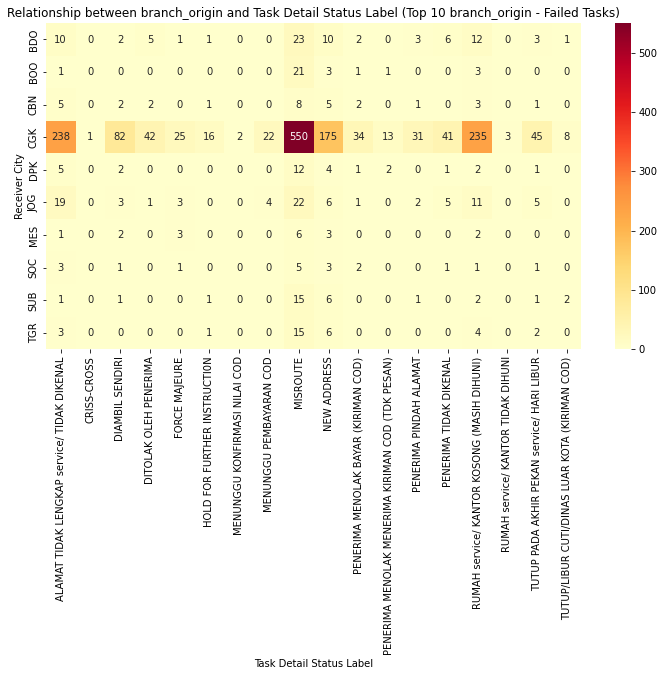

In [78]:
heatmap_taskStat("Failed", "branch_origin",10)

From Figure above we can conclude that Most branch is Failed to deliver the package is CGK because Missroute, Kosong masih dihuni, Alamt tidak lengkap, and New Addres 

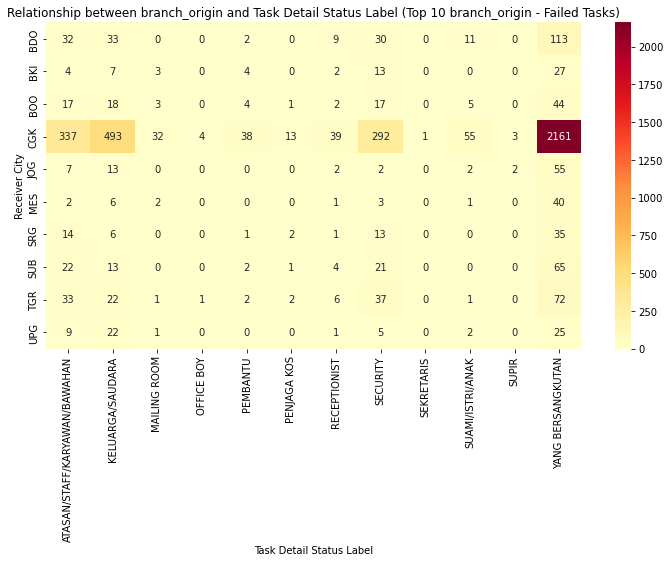

In [79]:
heatmap_taskStat("Success", "branch_origin",10)

### Reciever CIty

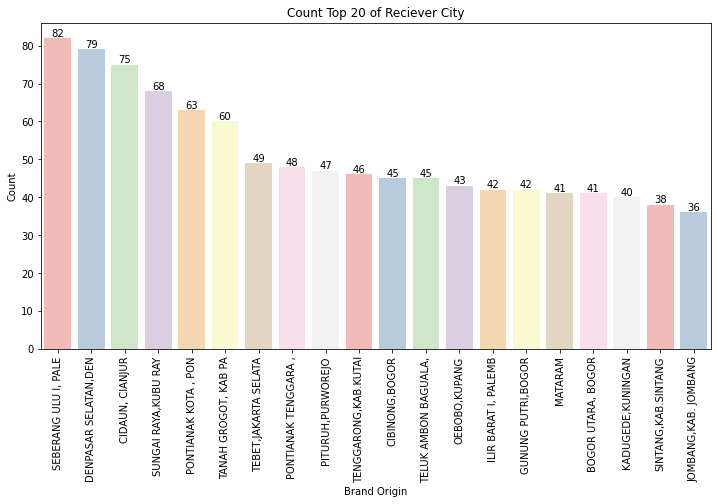

In [80]:
# Count the occurrences of each brand origin
brand_origin_counts = df['receiver_city'].value_counts().head(20)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_origin_counts.index, y=brand_origin_counts.values, palette="Pastel1")
plt.xticks(rotation=90)
plt.xlabel('Brand Origin')
plt.ylabel('Count')
plt.title('Count Top 20 of Reciever City')

# Add count values as text annotations
for i, count in enumerate(brand_origin_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

#### Reciever city and Task Status Label

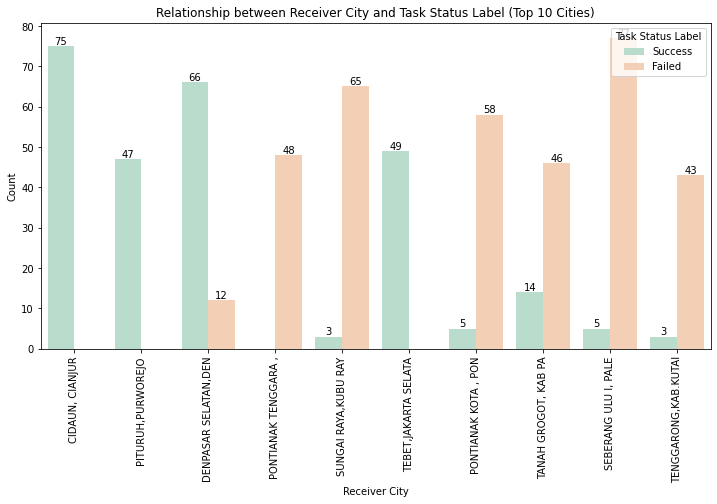

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each receiver city
receiver_counts = df['receiver_city'].value_counts().nlargest(10)

# Filter the data based on the top 10 receiver cities
filtered_df = df[df['receiver_city'].isin(receiver_counts.index)]

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot
ax = sns.countplot(x='receiver_city', hue='taskStatusLabel', data=filtered_df, palette="Pastel2")

# Set the x-axis label and rotate the tick labels for better visibility
plt.xlabel('Receiver City')
plt.xticks(rotation=90)

# Set the y-axis label
plt.ylabel('Count')

# Set the plot title
plt.title('Relationship between Receiver City and Task Status Label (Top 10 Cities)')

# Iterate over each bar to add the count value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Show the legend
plt.legend(title='Task Status Label')

# Display the plot
plt.show()


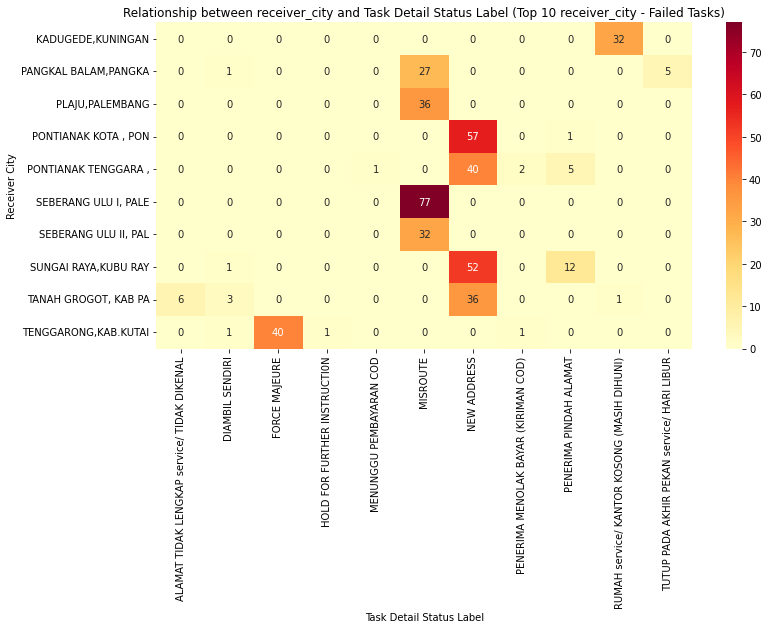

In [82]:
heatmap_taskStat("Failed", "receiver_city", 10)

From Figure above we can conclude that Most City that is Failed to deliver the package are Seberang Ulu I, Pale because Missroute and Pontianak because New address

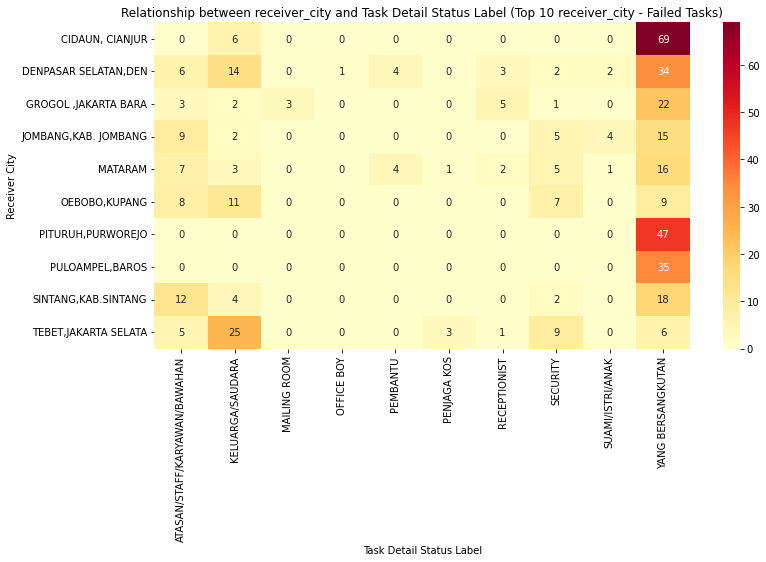

In [83]:
heatmap_taskStat("Success", "receiver_city", 10)

From Figure above we can conclude that Most City that is Success to deliver the package are Cidaun, Pituruh, Puloampelas

In [84]:
df

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,lon,lat,cod_amount,cod_received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,taskStatus_1
0,2022-11-01 20:17:26 +0700,pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13.000,CGK,COLF01
1,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.300,CGK,COLF01
2,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3.000,CGK,COLF01
3,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01
4,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562.0,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3.000,CGK,COLF01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,2022-11-10 09:07:12 +0700,debonairPonie1,2022-11-10 09:38:04 +0700,done,Delivery,501af4e040a742e9e878,0.000000,0.000000,NaN,No applicable,CGK,Success,"PALMERAH ,JAKARTA BA",ATASAN/STAFF/KARYAWAN/BAWAHAN,D10,1.000,CGK,COLF01
8330,2022-11-10 09:21:42 +0700,murkyThrushe3,2022-11-10 09:37:52 +0700,done,Delivery,5cc952d9e9f8066dbf24,110.352054,-7.892571,NaN,No applicable,JOG,Failed,KOTA BANTUL,ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL,U01,1.000,TGR,COLF02
8331,2022-11-10 09:36:44 +0700,enragedCake7,2022-11-10 09:37:55 +0700,done,Delivery,1b136b5a3c60749eb571,105.664897,-5.359063,NaN,No applicable,TKG,Success,MARGA SEKAMPUNG KAB.,YANG BERSANGKUTAN,D01,1.440,CGK,COLF01
8332,2022-11-10 07:25:40 +0700,lyingPaella2,2022-11-10 10:37:53 +0800,done,Delivery,e92e813c8539080c922e,119.877173,-8.513305,151000.0,False,KOE,Failed,"KOMODO,LABUAN BAJO",PENERIMA PINDAH ALAMAT,U03,0.600,CGK,COLF02
